In [0]:
!pip install -q quandl

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import quandl
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,8
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import csv
from csv import reader
from csv import writer

In [48]:
df=pd.read_csv("/content/drive/My Drive/final_dataset.csv",)
df

,Unnamed: 0,date,Category,high,low,open,close,volume,adj_close,comp,wr,moving_avg,RSI,stoch
0,0,01-07-2015,Transportation,312.700012,306.500000,308.799988,311.299988,2854143,303.809296,Adani Ports & SEZ,-22.580994,311.299988,0.000000,77.419006
1,1,02-07-2015,Transportation,319.000000,311.899994,312.450012,316.049988,8669541,308.445007,Adani Ports & SEZ,-23.600098,313.674988,0.000000,76.399902
2,2,03-07-2015,Transportation,325.750000,319.000000,319.950012,320.799988,5189498,313.080688,Adani Ports & SEZ,-25.714349,316.049988,0.000000,74.285651
3,3,06-07-2015,Transportation,321.100006,316.250000,316.950012,320.100006,2853145,312.397553,Adani Ports & SEZ,-29.350618,317.062492,0.000000,70.649382
4,4,07-07-2015,Transportation,334.700012,321.600006,321.799988,333.049988,7877450,325.035919,Adani Ports & SEZ,-5.851148,320.259991,93.137435,94.148852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58695,58695,01-04-2020,Media & Entertainment,126.750000,120.000000,124.000000,120.900001,6571413,120.900001,ZEEL,-91.958041,141.136667,30.112364,8.263475
58696,58696,03-04-2020,Media & Entertainment,125.949997,119.050003,123.000000,124.349999,7887911,124.349999,ZEEL,-87.604792,136.716668,31.874355,14.577463
58697,58697,07-04-2020,Media & Entertainment,143.000000,126.650001,129.000000,140.899994,11487040,140.899994,ZEEL,-62.112685,133.923334,39.689528,37.887315
58698,58698,08-04-2020,Media & Entertainment,148.149994,135.250000,138.000000,143.149994,10046602,143.149994,ZEEL,-58.943671,132.376666,40.680751,41.056329


In [0]:
df['date'] = pd.to_datetime(df.date,format='%d-%m-%Y')

Choose company-

In [50]:
df=df[df['comp']=='HDFC']
df

,Unnamed: 0,date,Category,high,low,open,close,volume,adj_close,comp,wr,moving_avg,RSI,stoch
18784,18784,2015-07-01,NaN,818.200012,818.200012,818.200012,818.200012,0,764.733032,HDFC,-0.000000,461.983331,0.000000,100.000000
18785,18785,2015-07-02,NaN,818.200012,818.200012,818.200012,818.200012,0,764.733032,HDFC,-0.000000,488.966665,0.000000,100.000000
18786,18786,2015-07-03,NaN,818.200012,818.200012,818.200012,818.200012,0,764.733032,HDFC,-0.000000,513.853333,0.000000,100.000000
18787,18787,2015-07-06,NaN,818.200012,818.200012,818.200012,818.200012,0,764.733032,HDFC,-0.000000,540.590000,0.000000,100.000000
18788,18788,2015-07-07,NaN,818.200012,818.200012,818.200012,818.200012,0,764.733032,HDFC,-0.000000,565.666669,0.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19953,19953,2020-04-01,NaN,1693.599976,1575.900024,1645.500000,1583.500000,6752007,1583.500000,HDFC,-83.075733,1697.906665,36.910374,16.924267
19954,19954,2020-04-03,NaN,1578.800049,1482.250000,1575.500000,1499.550049,10149368,1499.550049,HDFC,-95.986144,1672.830005,34.400247,5.157612
19955,19955,2020-04-07,NaN,1577.500000,1517.599976,1574.699951,1555.150024,12307166,1555.150024,HDFC,-83.855337,1638.720003,37.420191,20.607910
19956,19956,2020-04-08,NaN,1692.000000,1535.000000,1543.400024,1558.800049,8974317,1558.800049,HDFC,-78.471413,1619.856673,37.622172,22.687422


In [51]:
df.shape

(1174, 14)

## Visualizing history of closing price

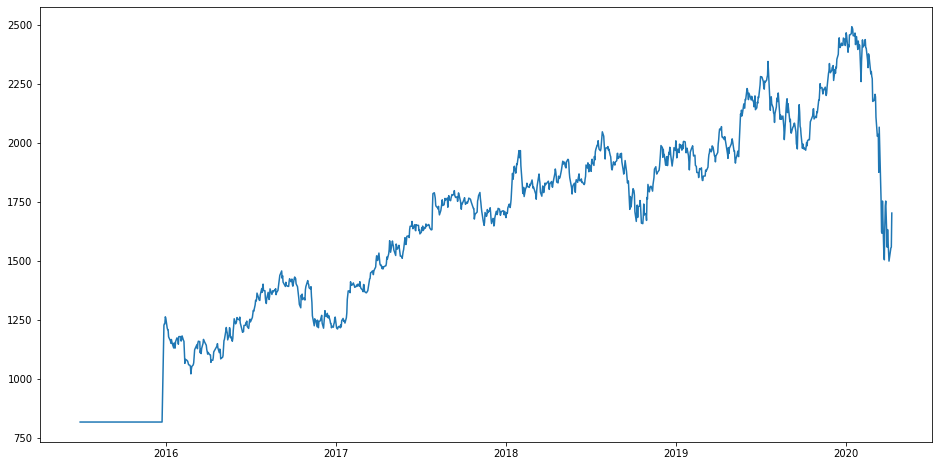

In [52]:
#plot
plt.plot(df['date'],df['close'], label='Close Price history')

In [53]:
# Get the Adjusted Close Price
df = df[['date','wr',	'moving_avg'	,'RSI',	'stoch','adj_close']]
#Take a look at the new data
print (df)

            date         wr   moving_avg        RSI       stoch    adj_close
18784 2015-07-01  -0.000000   461.983331   0.000000  100.000000   764.733032
18785 2015-07-02  -0.000000   488.966665   0.000000  100.000000   764.733032
18786 2015-07-03  -0.000000   513.853333   0.000000  100.000000   764.733032
18787 2015-07-06  -0.000000   540.590000   0.000000  100.000000   764.733032
18788 2015-07-07  -0.000000   565.666669   0.000000  100.000000   764.733032
...          ...        ...          ...        ...         ...          ...
19953 2020-04-01 -83.075733  1697.906665  36.910374   16.924267  1583.500000
19954 2020-04-03 -95.986144  1672.830005  34.400247    5.157612  1499.550049
19955 2020-04-07 -83.855337  1638.720003  37.420191   20.607910  1555.150024
19956 2020-04-08 -78.471413  1619.856673  37.622172   22.687422  1558.800049
19957 2020-04-09 -38.955348  1616.343335  45.124395   61.044652  1703.099976

[1174 rows x 6 columns]


## Preprocessing and selecting features-

In [0]:
df=df.dropna()

In [0]:
X=df[['wr',	'moving_avg'	,'RSI',	'stoch']]
y=df['adj_close']
y=np.asarray(y)

In [0]:
X_train=X[:int(0.8*len(X))]
X_train_date=df['date'][:int(0.8*len(X))]
X_test=X[int(0.8*len(X)):]
X_test_date=df['date'][int(0.8*len(X)):]
y_train=y[:int(0.8*len(y))]
y_test=y[int(0.8*len(y)):]

In [0]:
minn=np.min(X_train)
maxx=np.max(X_train)
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_test=(X_test-minn)/(maxx-minn)

## Visualizing the train-test split:

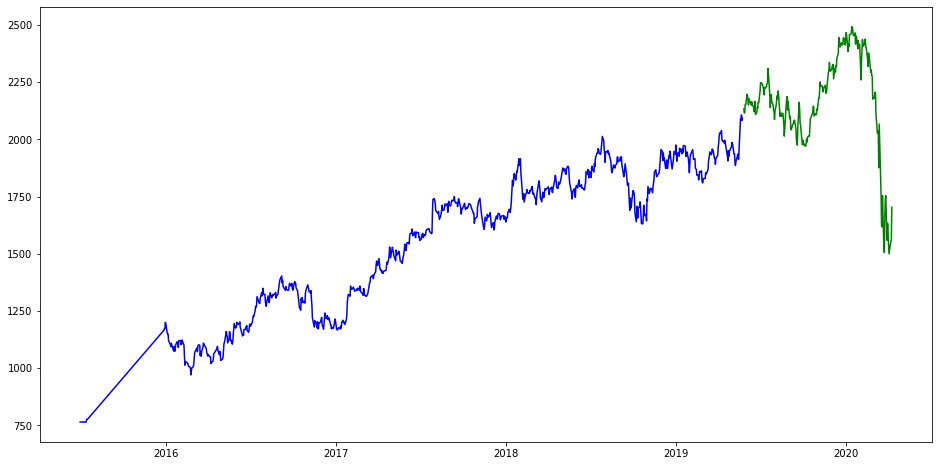

In [58]:
plt.plot(X_train_date,y_train, 'blue', label='Training Data')
plt.plot(X_test_date,y_test, 'green', label='Testing Data')

# SVR (Support Vector Regression)
Support Vector regression is a type of Support vector machine that supports **linear and non-linear regression.**

The work of the SVM is to approximate the function we used to generate the training set as in a classification problem.

## We will try 3 Kernels of the SVR function to see which suits best since all 3 fit different characteristics-

In [59]:
svr_lin  = SVR(kernel='linear', C=1e3,gamma=0.1)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin.fit(X_train, y_train)
svr_poly.fit(X_train,y_train)
svr_rbf.fit(X_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## SVR Linear Kernel-

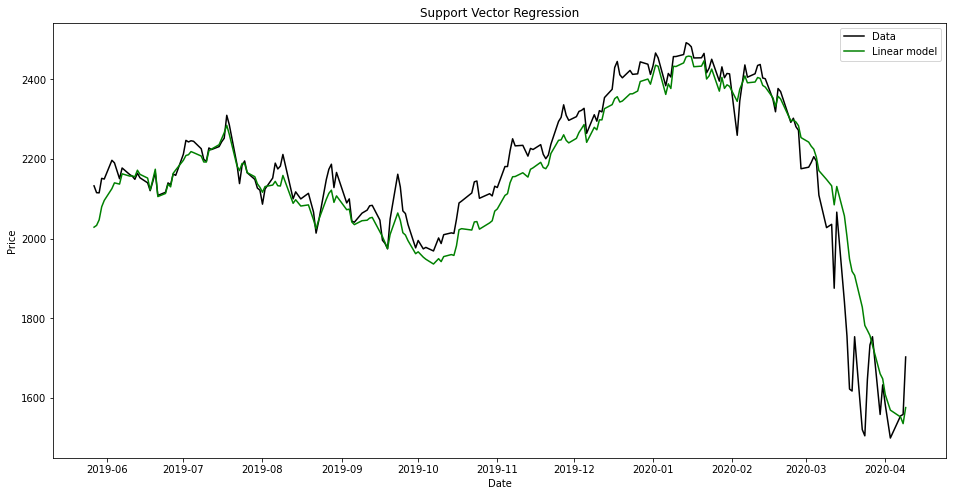

In [60]:
plt.plot(X_test_date, y_test, c='k', label='Data')
y_lin=svr_lin.predict(X_test)
plt.plot(X_test_date, y_lin, c='g', label='Linear model')
   
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

## SVR RBF kernel-

The most important SVR parameter is the Kernel type. 

It can be linear,polynomial or gaussian. 

We have a non-linear condition so we can select polynomial or gaussian but here we select RBF(a gaussian type) kernel.

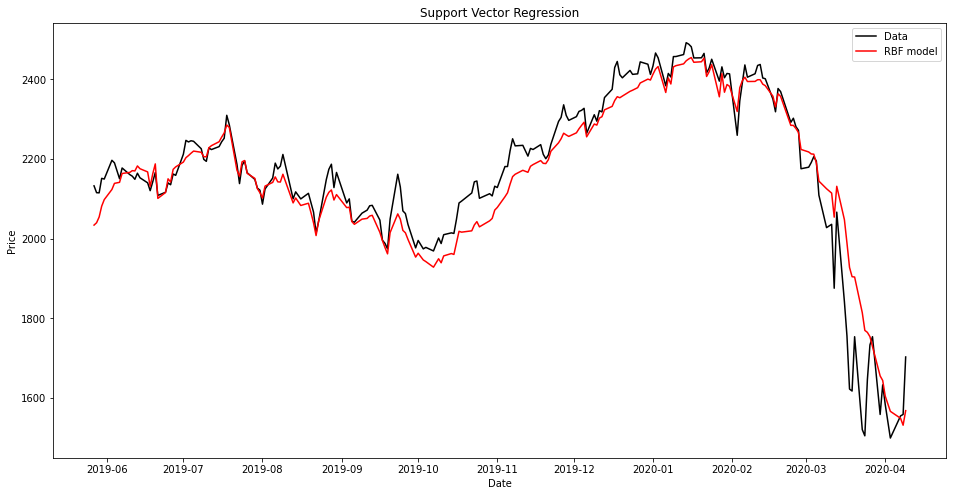

In [61]:
plt.plot(X_test_date, y_test, c='k', label='Data')
y_rbf=svr_rbf.predict(X_test)
plt.plot(X_test_date, y_rbf, c='r', label='RBF model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

## SVR Poly kernel-

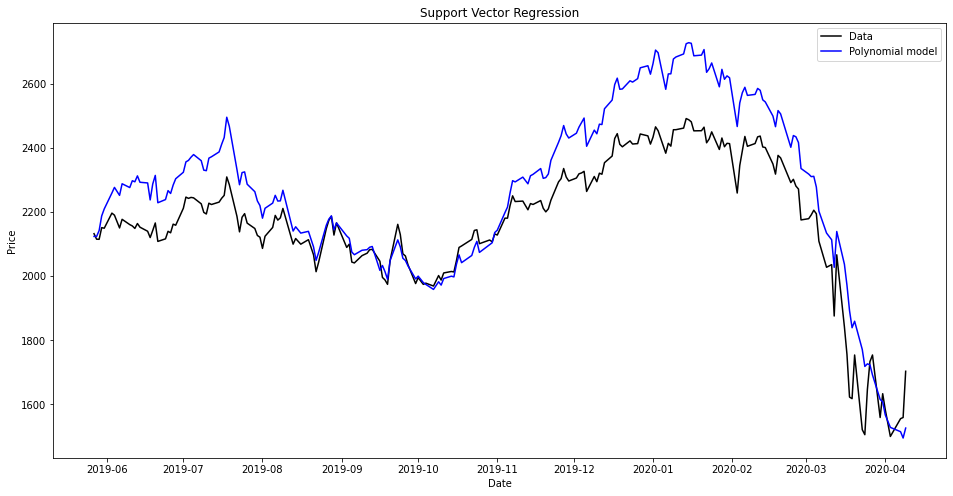

In [62]:
plt.plot(X_test_date, y_test, c='k', label='Data')
y_poly=svr_poly.predict(X_test)
plt.plot(X_test_date, y_poly, c='b', label='Polynomial model')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

## Comparative analysis-

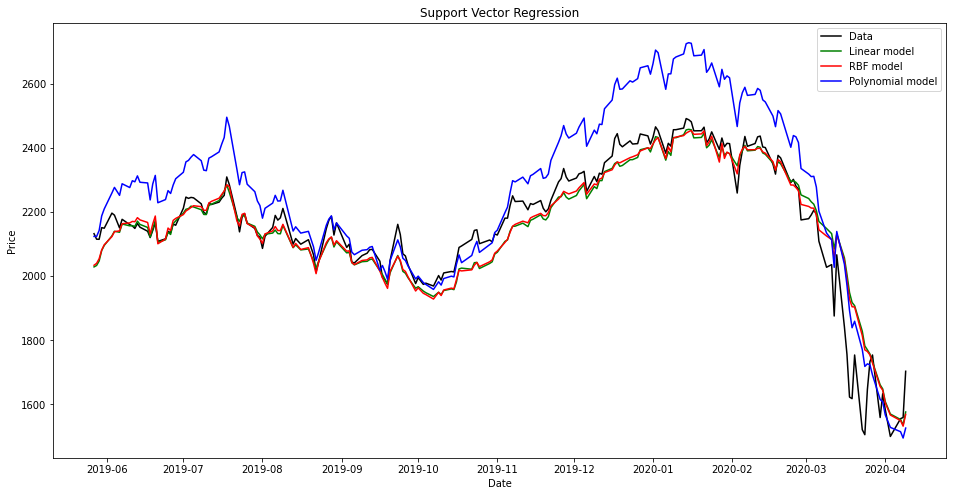

In [63]:
plt.plot(X_test_date, y_test, c='k', label='Data')
plt.plot(X_test_date, svr_lin.predict(X_test), c='g', label='Linear model')
plt.plot(X_test_date, svr_rbf.predict(X_test), c='r', label='RBF model') 
plt.plot(X_test_date, svr_poly.predict(X_test), c='b', label='Polynomial model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

## RMS error and confidence SVR RBF-

In [64]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svr_confidence = svr_rbf.score(X_test, y_test)
print("RMS error: ",np.sqrt(np.mean(np.square(y_lin-y_test))))
print("svr confidence: ", svr_confidence)

RMS error:  67.3146740588623
svr confidence:  0.9083847194394947


## RMS error and confidence SVR Linear-

In [65]:
svr_confidence = svr_lin.score(X_test, y_test)
print("RMS error: ",np.sqrt(np.mean(np.square(y_rbf-y_test))))
print("svr confidence: ", svr_confidence)

RMS error:  63.425634177894835
svr confidence:  0.8968052094817665


## RMS error and confidence SVR Poly-

In [66]:
svr_confidence = svr_poly.score(X_test, y_test)
print("RMS error: ",np.sqrt(np.mean(np.square(y_poly-y_test))))
print("svr confidence: ", svr_confidence)

RMS error:  132.43274217999976
svr confidence:  0.6005807215915875
